In [ ]:
#Import all the required libraries
import pandas as pd

In [ ]:
#Read the csv file
df=pd.read_excel("trained.xlsx")

In [ ]:
#Print the first five rows of the data
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Give the information about the data
df.info

<bound method DataFrame.info of           id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534 

In [ ]:
#Print the shape of the data
df.shape

(20758, 18)

In [ ]:
#Gives the statistics about the data
df.describe

<bound method NDFrame.describe of           id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.88053

### Data Preoprocessing

In [ ]:
#Check the null values in the data
df.isnull().sum()

id                                 0
Gender                             2
Age                               16
Height                            15
Weight                            16
family_history_with_overweight     2
FAVC                               2
FCVC                               6
NCP                                4
CAEC                               5
SMOKE                              2
CH2O                              12
SCC                                0
FAF                                6
TUE                                6
CALC                               4
MTRANS                             3
NObeyesdad                         1
dtype: int64

In [ ]:
#Gives the information about the data type of every column
df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
#Replace categorical values with mode except for NObeyesdad
for i in df.columns:
    if df[i].isnull().sum() > 0 and df[i].dtype == 'object' and i!='NObeyesdad':
        mode_value = df[i].mode()[0]
        df[i] = df[i].fillna(mode_value)


In [ ]:
df.isnull().sum()

id                                 0
Gender                             0
Age                               16
Height                            15
Weight                            16
family_history_with_overweight     0
FAVC                               0
FCVC                               6
NCP                                4
CAEC                               0
SMOKE                              0
CH2O                              12
SCC                                0
FAF                                6
TUE                                6
CALC                               0
MTRANS                             0
NObeyesdad                         1
dtype: int64

In [ ]:
#Replace numerical values with mean
for i in df.columns:
    if df[i].isnull().sum() > 0 and df[i].dtype != 'object':
        mean_value = df[i].mean()
        df[i] = df[i].fillna(mean_value)

In [ ]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        1
dtype: int64

In [ ]:
#Drp the row which doesnot contain any label
df = df.dropna()

In [ ]:
#Rename the columns CH2O and TUE with Water Consumption and Television Viewing Obesity
df = df.rename(columns={'CH2O':'Water Consumption', 'TUE':'Television Viewing and Obesity'})

In [ ]:
#Check whether there are any duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, Water Consumption, SCC, FAF, Television Viewing and Obesity, CALC, MTRANS, NObeyesdad]
Index: []


In [ ]:
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Water Consumption,SCC,FAF,Television Viewing and Obesity,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [ ]:
#Give all features as X
X=df.drop(["NObeyesdad"],axis=1)

In [ ]:
X.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Water Consumption,SCC,FAF,Television Viewing and Obesity,CALC,MTRANS
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation


In [ ]:
#Take the label column NObeyesdad as y
y=df["NObeyesdad"]

In [ ]:
y

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20757, dtype: object

In [ ]:
#Drop column id as it is not useful in the model predictions
X=X.drop(["id"],axis=1)

In [ ]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Water Consumption,SCC,FAF,Television Viewing and Obesity,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Print all the unique values in the categorical columns
for i in ['Gender','family_history_with_overweight','FAVC','CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS' ]:
  print('Column name: ', i, '  Unique values: ', X[i].unique())

Column name:  Gender   Unique values:  ['Male' 'Female']
Column name:  family_history_with_overweight   Unique values:  ['yes' 'no']
Column name:  FAVC   Unique values:  ['yes' 'no']
Column name:  CAEC   Unique values:  ['Sometimes' 'Frequently' 'no' 'Always']
Column name:  SMOKE   Unique values:  ['no' 'yes']
Column name:  SCC   Unique values:  ['no' 'yes']
Column name:  CALC   Unique values:  ['Sometimes' 'no' 'Frequently']
Column name:  MTRANS   Unique values:  ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


In [ ]:
#One hot encoding for the Gender column which creates two other columns named Male and Female
one_hot_encoded_gender = pd.get_dummies(X['Gender']).astype(int)
X = pd.concat([X, one_hot_encoded_gender], axis=1)

In [ ]:
#Now drop the gender column
X=X.drop(["Gender"],axis=1)

In [ ]:
X.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Water Consumption,SCC,FAF,Television Viewing and Obesity,CALC,MTRANS,Female,Male
0,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,0,1
1,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,1,0
2,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,1,0
3,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,1,0
4,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,0,1


In [ ]:
#One hot encoding for the MTRANS column which creates five other columns named Automobile, Bike, Motorbike, Public_Transportation and walking
one_hot_encoded_MTRANS = pd.get_dummies(X['MTRANS']).astype(int)
X = pd.concat([X, one_hot_encoded_MTRANS], axis=1)

In [ ]:
#Drp MTRANS column
X=X.drop(["MTRANS"],axis=1)

In [ ]:
X.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Water Consumption,...,FAF,Television Viewing and Obesity,CALC,Female,Male,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,...,0.000000,0.976473,Sometimes,0,1,0,0,0,1,0
1,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,...,1.000000,1.000000,no,1,0,1,0,0,0,0
2,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,...,0.866045,1.673584,no,1,0,0,0,0,1,0
3,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,...,1.467863,0.780199,Sometimes,1,0,0,0,0,1,0
4,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,...,1.967973,0.931721,Sometimes,0,1,0,0,0,1,0


In [ ]:
X.shape

(20757, 21)

In [ ]:
#Mapping values for the columns which contains no and yes to 0 and 1
mapping = {'no': 0, 'yes': 1}

In [ ]:
#Now map yes and no to 1 and 0 for columns family_history_with_overweight, FAVC, SMOKE, SCC
X['family_history_with_overweight'] = X['family_history_with_overweight'].map(mapping)
X['FAVC'] = X['FAVC'].map(mapping)
X['SMOKE'] = X['SMOKE'].map(mapping)
X['SCC'] = X['SCC'].map(mapping)

In [ ]:
#Mapping values for the columns which contains no, Sometimes, Frequently, Always to 0, 1, 2 and 3
mapping1 = {'Sometimes':1, 'Frequently':2, 'no':0, 'Always':3}

In [ ]:
#Now map no, Sometimes, Frequently, Always to 0, 1, 2 and 3 for columns CAEC and CALC
X['CAEC'] = X['CAEC'].map(mapping1)
X['CALC'] = X['CALC'].map(mapping1)

In [ ]:
X.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Water Consumption,...,FAF,Television Viewing and Obesity,CALC,Female,Male,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,...,0.000000,0.976473,1,0,1,0,0,0,1,0
1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,...,1.000000,1.000000,0,1,0,1,0,0,0,0
2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,...,0.866045,1.673584,0,1,0,0,0,0,1,0
3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,...,1.467863,0.780199,1,1,0,0,0,0,1,0
4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,...,1.967973,0.931721,1,0,1,0,0,0,1,0


In [ ]:
X.dtypes

Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
Water Consumption                 float64
SCC                                 int64
FAF                               float64
Television Viewing and Obesity    float64
CALC                                int64
Female                              int64
Male                                int64
Automobile                          int64
Bike                                int64
Motorbike                           int64
Public_Transportation               int64
Walking                             int64
dtype: object

In [ ]:
#Caluclate the correlation for all the features
corr = X.iloc[:,0:14].corr()
corr

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Water Consumption,SCC,FAF,Television Viewing and Obesity,CALC
Age,1.000000,-0.011883,0.283060,0.261277,0.056979,0.034666,-0.048637,-0.151622,0.056035,-0.016295,-0.108907,-0.192103,-0.295952,0.070014
Height,-0.011883,1.000000,0.416101,0.227599,0.115497,-0.071577,0.191148,-0.068803,0.069758,0.183777,-0.095726,0.295239,0.076565,0.089279
Weight,0.283060,0.416101,1.000000,0.513793,0.228857,0.245931,0.095970,-0.337158,0.040438,0.317524,-0.185192,-0.084960,-0.086571,0.216587
family_history_with_overweight,0.261277,0.227599,0.513793,1.000000,0.152148,0.047960,0.044712,-0.204257,0.018785,0.191566,-0.166757,-0.094525,0.005813,-0.002245
FAVC,0.056979,0.115497,0.228857,0.152148,1.000000,0.007090,0.011478,-0.115671,-0.016007,0.039126,-0.111895,-0.067101,0.034826,0.080249
FCVC,0.034666,-0.071577,0.245931,0.047960,0.007090,1.000000,0.113376,0.010694,-0.012178,0.101288,0.022148,-0.089576,-0.147846,0.128592
NCP,-0.048637,0.191148,0.095970,0.044712,0.011478,0.113376,1.000000,0.089942,0.006836,0.080814,0.006661,0.100871,0.067425,0.099559
CAEC,-0.151622,-0.068803,-0.337158,-0.204257,-0.115671,0.010694,0.089942,1.000000,0.019701,-0.132610,0.099424,0.092117,0.049671,-0.066890
SMOKE,0.056035,0.069758,0.040438,0.018785,-0.016007,-0.012178,0.006836,0.019701,1.000000,-0.023466,0.017184,0.008399,-0.016087,0.023237
Water Consumption,-0.016295,0.183777,0.317524,0.191566,0.039126,0.101288,0.080814,-0.132610,-0.023466,1.000000,-0.031702,0.082945,-0.010653,0.082851


### Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Text(0.5, 1.0, 'Heat Map')

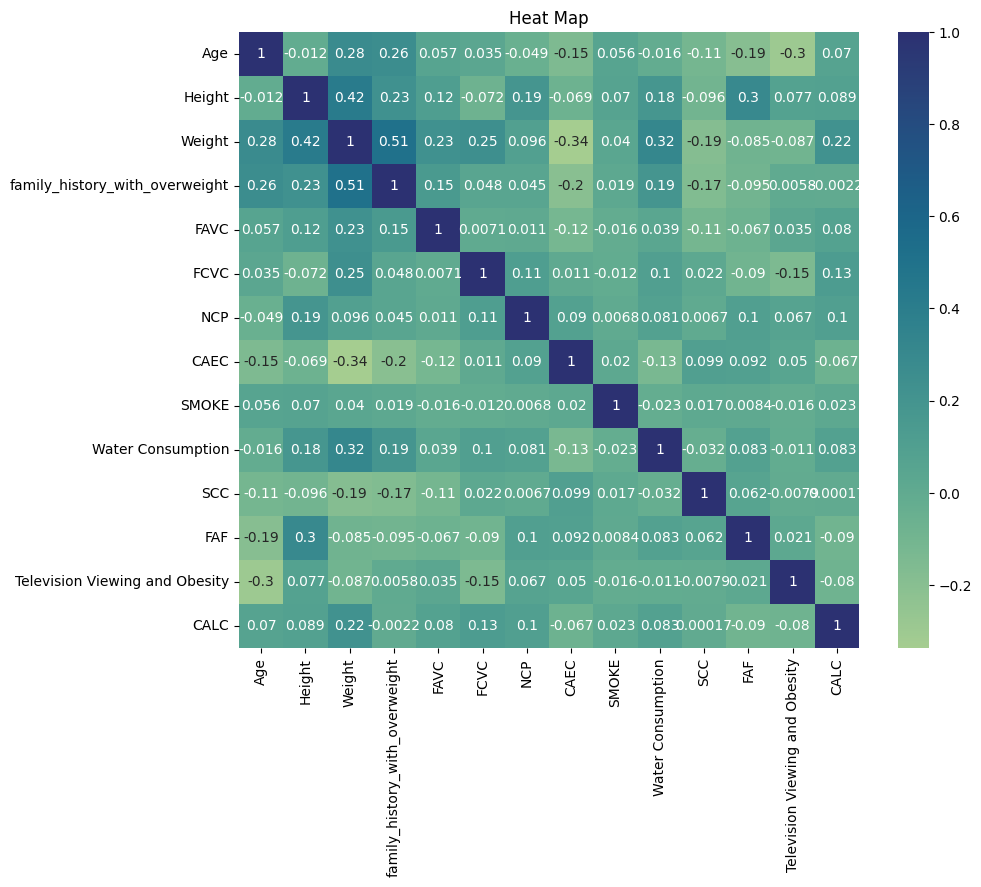

In [ ]:
#Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True, cmap='crest')
plt.title('Heat Map')

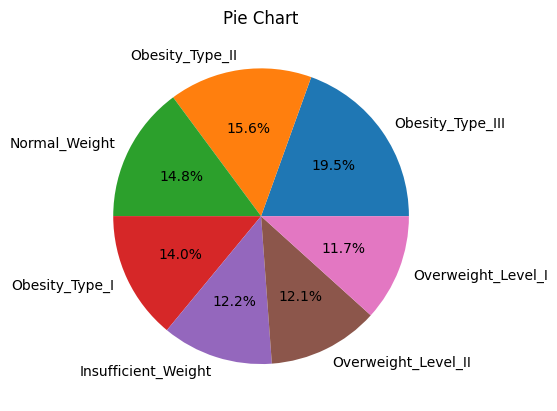

In [ ]:
#Plot the pie graph for NObeyesdad to know how much percentage does each class has
df['NObeyesdad'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart')
plt.ylabel('')
plt.show()

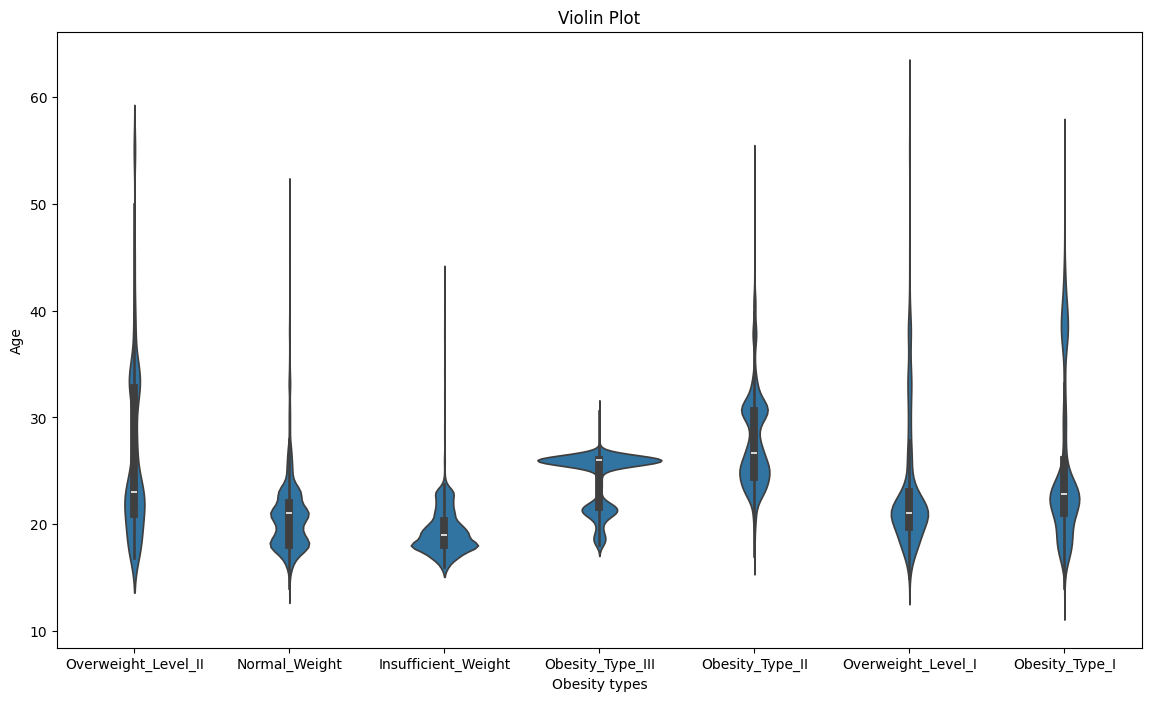

In [ ]:
#PLot the Violin plot for NObeyesdad and Age to know the relation between age and obesity
plt.figure(figsize=(14,8))
sns.violinplot(x='NObeyesdad', y='Age', data=df)
plt.title('Violin Plot')
plt.xlabel('Obesity types')
plt.ylabel('Age')
plt.show()

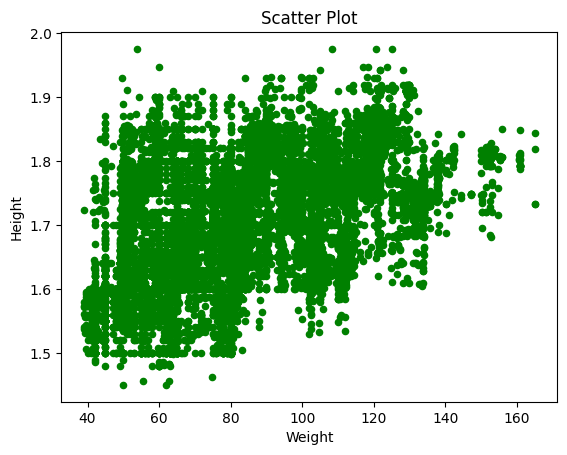

In [ ]:
#Plot the scatterplot for Weight and Height
df.plot.scatter(x='Weight', y='Height',c='g')
plt.title('Scatter Plot')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

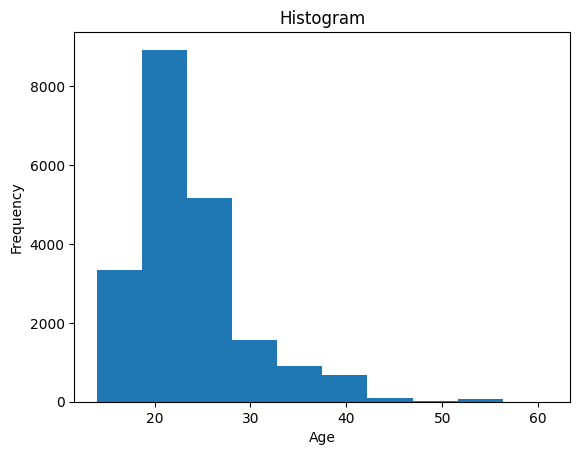

In [ ]:
#Plot the Histogram for age to know the realtion between number of people and their age
df['Age'].plot.hist()
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Figure size 2000x800 with 0 Axes>

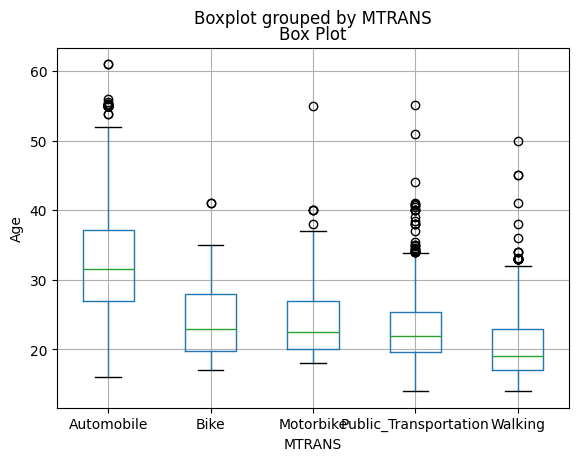

In [ ]:
#Plot the boxplot for Age and MTRANS
plt.figure(figsize=(20,8))
df.boxplot(column='Age', by='MTRANS')
plt.title('Box Plot')
plt.xlabel('MTRANS')
plt.ylabel('Age')
plt.show()

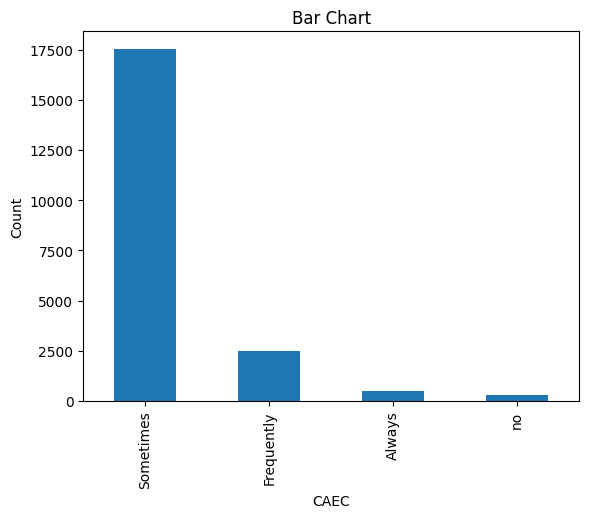

In [ ]:
#Plot the bar graph for CAEC to get the count of sometimes, frequently, Always, no
df['CAEC'].value_counts().plot(kind='bar')
plt.title('Bar Chart')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.show()

In [ ]:
#To get all the classes in the data
y.unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [ ]:
#Find the outliers in the data
for i in X.columns:
    mean = np.mean(X[i])
    std_dev = np.std(X[i])
    threshold = 3  # Adjust this threshold as needed
    outliers_std_dev = X[(X[i] - mean).abs() > threshold * std_dev]
    print(f"Outliers in {i} using Standard Deviation Method:")
    print(outliers_std_dev)
    print()



Outliers in Age using Standard Deviation Method:
             Age    Height      Weight  family_history_with_overweight  FAVC  \
25     41.318302  1.853223   96.078462                               1     1   
56     55.272573  1.700000   80.000000                               1     1   
90     43.604901  1.698626   77.355417                               1     1   
190    42.316070  1.661277   90.000000                               1     1   
269    41.000000  1.500000   80.000000                               1     1   
...          ...       ...         ...                             ...   ...   
20281  55.000000  1.650000   80.000000                               1     1   
20416  40.993179  1.534223   77.355417                               1     1   
20513  43.510672  1.643786   81.322970                               1     1   
20518  42.586285  1.572791   81.108599                               1     1   
20562  41.000000  1.750000  115.000000                               1 

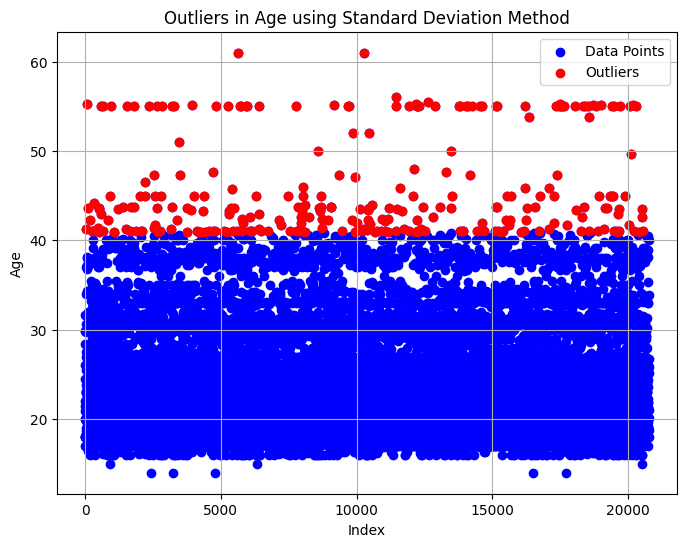

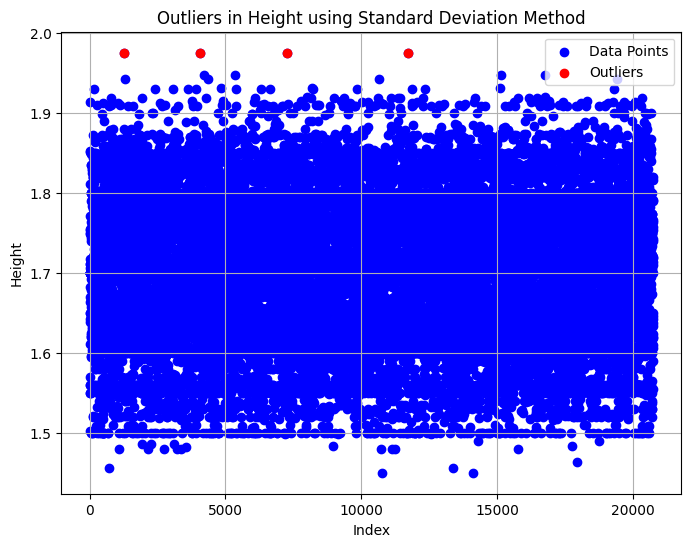

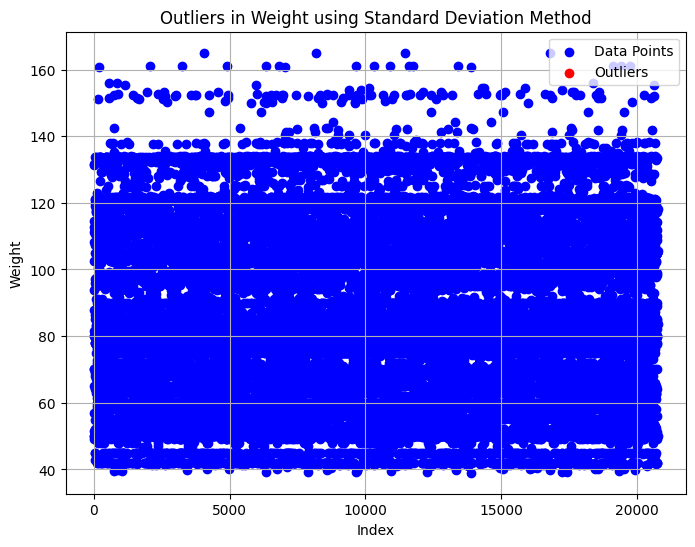

In [ ]:
#Plot all the outliers in the data
for i in ['Age', 'Height', 'Weight']:
    mean = np.mean(X[i])
    std_dev = np.std(X[i])
    threshold = 3
    outliers_std_dev = X[(X[i] - mean).abs() > threshold * std_dev]

    plt.figure(figsize=(8, 6))
    plt.scatter(X.index, X[i], color='blue', label='Data Points')
    plt.scatter(outliers_std_dev.index, outliers_std_dev[i], color='red', label='Outliers')

    plt.title(f"Outliers in {i} using Standard Deviation Method")
    plt.xlabel("Index")
    plt.ylabel(i)
    plt.legend()
    plt.grid(True)
    plt.show()

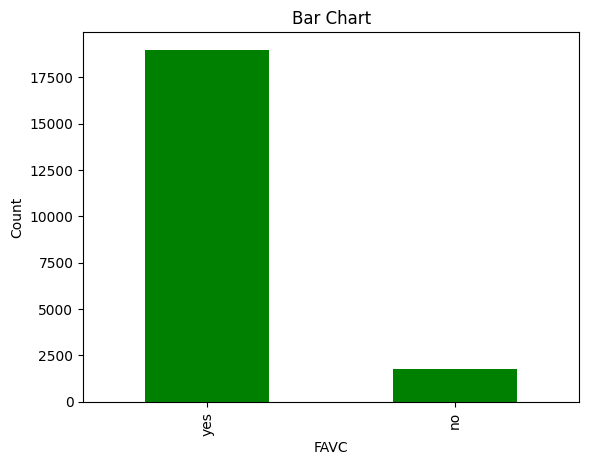

In [ ]:
#Plot the barchart for FAVC
df['FAVC'].value_counts().plot(kind='bar', color = 'g')
plt.title('Bar Chart')
plt.xlabel('FAVC')
plt.ylabel('Count')
plt.show()

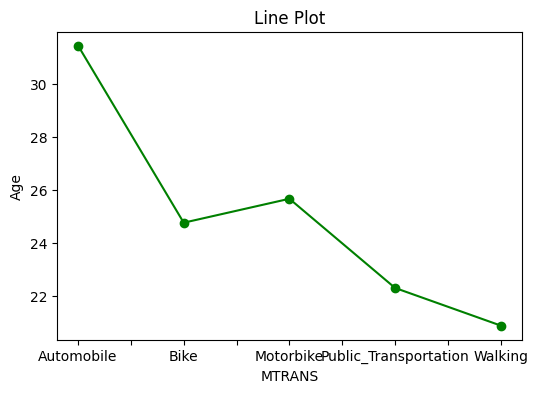

In [ ]:
#Plot the line plot for MTRANS and Age
plt.figure(figsize=(6, 4))
df.groupby('MTRANS')['Age'].mean().plot(marker='o', color = 'g')
plt.title('Line Plot')
plt.xlabel('MTRANS')
plt.ylabel('Age')
plt.show()

In [ ]:
#Import the Standard Scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#Normalize the data
scaler = StandardScaler()
print(scaler.fit(X))

StandardScaler()


In [ ]:
y

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20757, dtype: object

In [ ]:
mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II':3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}

In [ ]:
y = y.map(mapping)

In [ ]:
y

0        3
1        1
2        0
3        6
4        3
        ..
20753    5
20754    0
20755    5
20756    3
20757    5
Name: NObeyesdad, Length: 20757, dtype: int64

In [ ]:
y.head

<bound method NDFrame.head of 0        3
1        1
2        0
3        6
4        3
        ..
20753    5
20754    0
20755    5
20756    3
20757    5
Name: NObeyesdad, Length: 20757, dtype: int64>

## Applying ML algorithms

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)

In [ ]:
print('Confusion Matrix with logistic regression: ')
print(cm)
print('Accuracy Score with logistic regression: ', accuracy)
print('Precision Score with logistic regression: ', precision)
print('Recall Score with logistic regression: ', recall)
print('F1 Score with logistic regression: ', f1)
print('Classification Report score with logistic regression: ')
print(cr)

Confusion Matrix with logistic regression: 
[[489 149   4   0   0   0   1]
 [150 485  93  33  12   1   5]
 [  6 151 250  85  61  26  20]
 [  1  37 122 261 149  47  21]
 [  0   4  42  99 377 139  51]
 [  0   0   0   7  34 778   1]
 [  1   0   0   0  12   1 985]]
Accuracy Score with logistic regression:  0.6984585741811176
Precision Score with logistic regression:  0.6833907279326522
Recall Score with logistic regression:  0.6984585741811176
F1 Score with logistic regression:  0.6877128705740079
Classification Report score with logistic regression: 
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       643
           1       0.59      0.62      0.60       779
           2       0.49      0.42      0.45       599
           3       0.54      0.41      0.46       638
           4       0.58      0.53      0.56       712
           5       0.78      0.95      0.86       820
           6       0.91      0.99      0.95       999

    accuracy

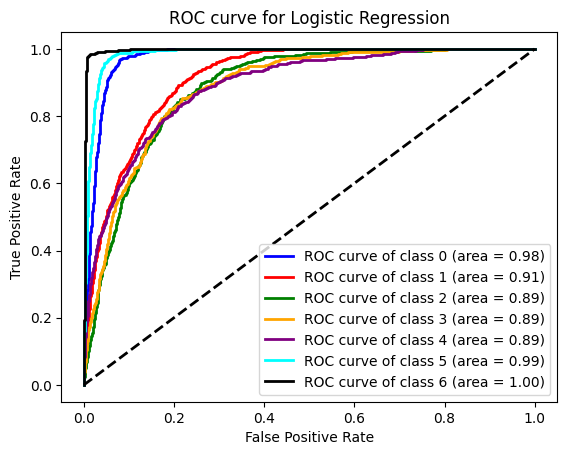

In [ ]:

y_bin = label_binarize(y_test, classes=[*range(7)])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'black'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### PCA for dimension reduction to get visualization


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

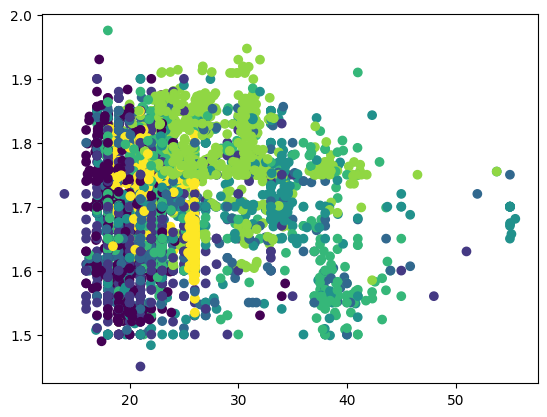

In [ ]:
plt.scatter(X_test['Age'],X_test['Height'], c=y_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, title='', resolution=0.02):
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#FF1493', '#00FF00'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


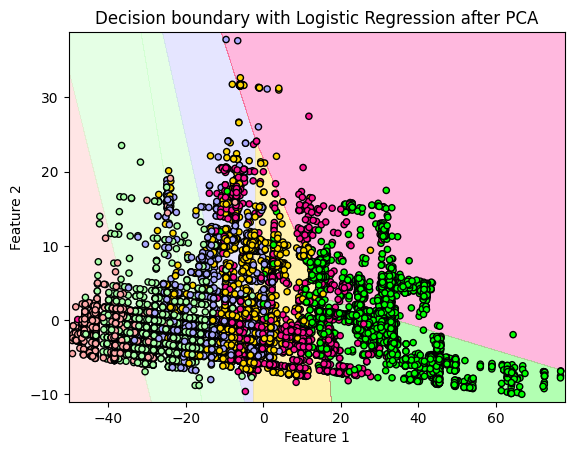

In [ ]:
log_reg_vis = LogisticRegression()
log_reg_vis.fit(X_train_pca, y_train)
plot_decision_boundary(X_train_pca, y_train, log_reg_vis, title='Decision boundary with Logistic Regression after PCA')


### K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)

In [ ]:
print('Confusion Matrix with K-Nearest Neighbors: ')
print(cm)
print('Accuracy Score with K-Nearest Neighbors: ', accuracy)
print('Precision Score with K-Nearest Neighbors: ', precision)
print('Recall Score with K-Nearest Neighbors: ', recall)
print('F1 Score with K-Nearest Neighbors: ', f1)
print('Classification Report score with K-Nearest Neighbors: ')
print(cr)

Confusion Matrix with K-Nearest Neighbors: 
[[593  50   0   0   0   0   0]
 [120 559  79  20   1   0   0]
 [  1  81 415  85  17   0   0]
 [  0  22  89 466  58   3   0]
 [  1   0  23  83 577  23   5]
 [  0   0   0   4  25 791   0]
 [  1   0   0   0   2   4 992]]
Accuracy Score with K-Nearest Neighbors:  0.8464354527938343
Precision Score with K-Nearest Neighbors:  0.8466983852912797
Recall Score with K-Nearest Neighbors:  0.8464354527938343
F1 Score with K-Nearest Neighbors:  0.845942196607488
Classification Report score with K-Nearest Neighbors: 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       643
           1       0.79      0.72      0.75       779
           2       0.68      0.69      0.69       599
           3       0.71      0.73      0.72       638
           4       0.85      0.81      0.83       712
           5       0.96      0.96      0.96       820
           6       0.99      0.99      0.99       999

    accuracy 

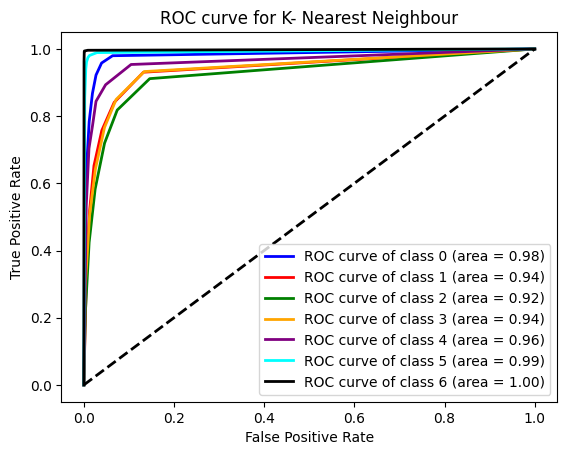

In [ ]:
y_bin = label_binarize(y_test, classes=[*range(7)])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'black'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for K- Nearest Neighbour')
plt.legend(loc="lower right")
plt.show()

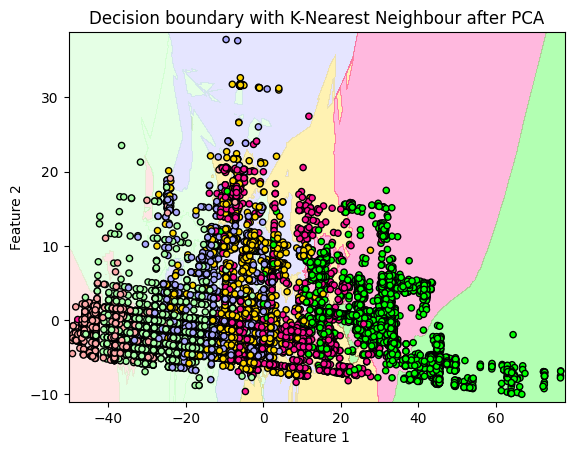

In [ ]:
knn_vis = KNeighborsClassifier(n_neighbors=6)
knn_vis.fit(X_train_pca, y_train)
# Plot the decision boundaries
plot_decision_boundary(X_train_pca, y_train, knn_vis, title='Decision boundary with K-Nearest Neighbour after PCA')

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = NB.predict(X_test)
y_pred_prob = NB.predict_proba(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)

In [ ]:
print('Confusion Matrix with Naive Bayes: ')
print(cm)
print('Accuracy Score with Naive Bayes: ', accuracy)
print('Precision Score with Naive Bayes: ', precision)
print('Recall Score with Naive Bayes: ', recall)
print('F1 Score with Naive Bayes: ', f1)
print('Classification Report score with Naive Bayes: ')
print(cr)

Confusion Matrix with Naive Bayes: 
[[489  32   5   1 112   0   4]
 [279 182  51  38 202   3  24]
 [ 42  62 127  44 291  27   6]
 [  9  31  19 128 359  91   1]
 [  1   4  14  31 447 212   3]
 [  0   2   0   9  30 779   0]
 [  1   0   0   2   0   1 995]]
Accuracy Score with Naive Bayes:  0.6063583815028901
Precision Score with Naive Bayes:  0.6296643799579701
Recall Score with Naive Bayes:  0.6063583815028901
F1 Score with Naive Bayes:  0.5769020866576603
Classification Report score with Naive Bayes: 
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       643
           1       0.58      0.23      0.33       779
           2       0.59      0.21      0.31       599
           3       0.51      0.20      0.29       638
           4       0.31      0.63      0.42       712
           5       0.70      0.95      0.81       820
           6       0.96      1.00      0.98       999

    accuracy                           0.61      5190
   mac

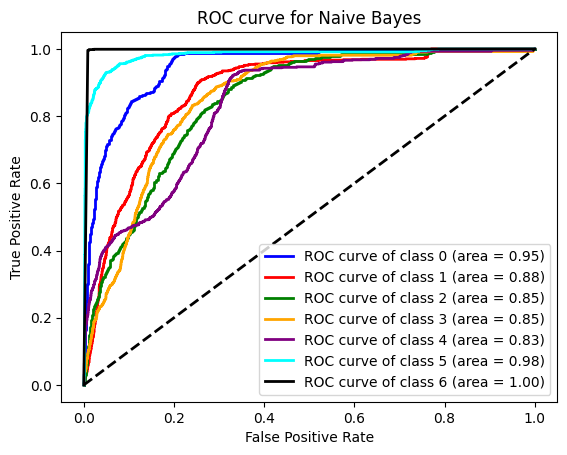

In [ ]:
y_bin = label_binarize(y_test, classes=[*range(7)])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'black'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

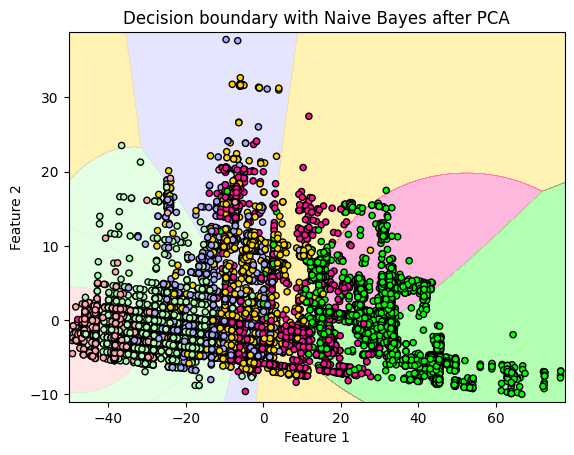

In [ ]:
NB_vis = GaussianNB()
NB_vis.fit(X_train_pca, y_train)
# Plot the decision boundaries
plot_decision_boundary(X_train_pca, y_train, NB_vis, title='Decision boundary with Naive Bayes after PCA')

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
svm_linear = SVC(probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
y_pred_prob = svm_linear.predict_proba(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)

In [ ]:
print('Confusion Matrix with SVM with linear kernel: ')
print(cm)
print('Accuracy Score with SVM with linear kernel: ', accuracy)
print('Precision Score with SVM with linear kernel: ', precision)
print('Recall Score with SVM with linear kernel: ', recall)
print('F1 Score with SVM with linear kernel: ', f1)
print('Classification Report score with SVM with linear kernel: ')
print(cr)

Confusion Matrix with SVM with linear kernel: 
[[542 101   0   0   0   0   0]
 [180 454 127  17   1   0   0]
 [  5 116 276 187  15   0   0]
 [  1  38  42 459  86  12   0]
 [  1   0   6 293 354  34  24]
 [  0   0   0   2  47 733  38]
 [  1   0   0   0   2   0 996]]
Accuracy Score with SVM with linear kernel:  0.7348747591522158
Precision Score with SVM with linear kernel:  0.7436653537986903
Recall Score with SVM with linear kernel:  0.7348747591522158
F1 Score with SVM with linear kernel:  0.7318546411126785
Classification Report score with SVM with linear kernel: 
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       643
           1       0.64      0.58      0.61       779
           2       0.61      0.46      0.53       599
           3       0.48      0.72      0.58       638
           4       0.70      0.50      0.58       712
           5       0.94      0.89      0.92       820
           6       0.94      1.00      0.97      

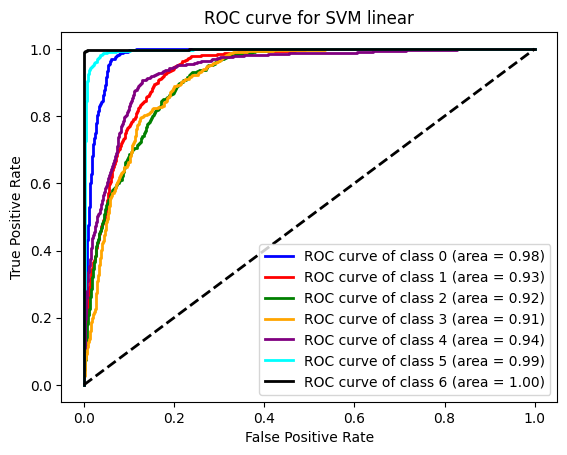

In [ ]:
y_bin = label_binarize(y_test, classes=[*range(7)])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'black'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for SVM linear')
plt.legend(loc="lower right")
plt.show()

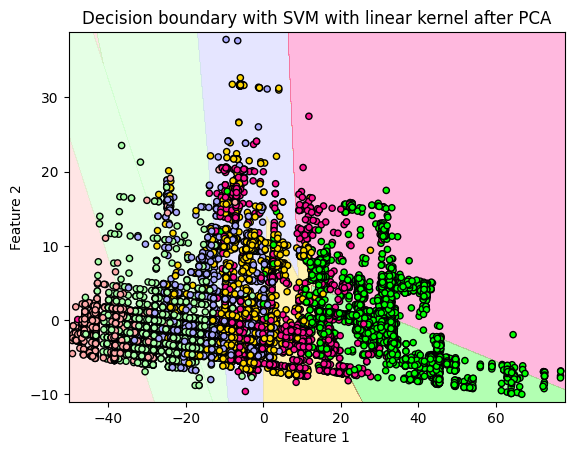

In [ ]:
SVM_vis = SVC(kernel='linear')
SVM_vis.fit(X_train_pca, y_train)
# Plot the decision boundaries
plot_decision_boundary(X_train_pca, y_train, SVM_vis, title='Decision boundary with SVM with linear kernel after PCA')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred_prob = dt.predict_proba(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)

In [ ]:
print('Confusion Matrix with Decision Tree: ')
print(cm)
print('Accuracy Score with Decision Tree: ', accuracy)
print('Precision Score with Decision Tree: ', precision)
print('Recall Score with Decision Tree: ', recall)
print('F1 Score with Decision Tree: ', f1)
print('Classification Report score with Decision Tree: ')
print(cr)

Confusion Matrix with Decision Tree: 
[[559  79   5   0   0   0   0]
 [ 48 626  82  18   4   0   1]
 [  7  83 374 103  30   1   1]
 [  0  15  84 476  57   6   0]
 [  2   4  25  66 584  31   0]
 [  1   0   1   7  28 781   2]
 [  1   0   0   0  10   1 987]]
Accuracy Score with Decision Tree:  0.8452793834296725
Precision Score with Decision Tree:  0.8459821540815552
Recall Score with Decision Tree:  0.8452793834296725
F1 Score with Decision Tree:  0.8454516288780357
Classification Report score with Decision Tree: 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       643
           1       0.78      0.80      0.79       779
           2       0.65      0.62      0.64       599
           3       0.71      0.75      0.73       638
           4       0.82      0.82      0.82       712
           5       0.95      0.95      0.95       820
           6       1.00      0.99      0.99       999

    accuracy                           0.85     

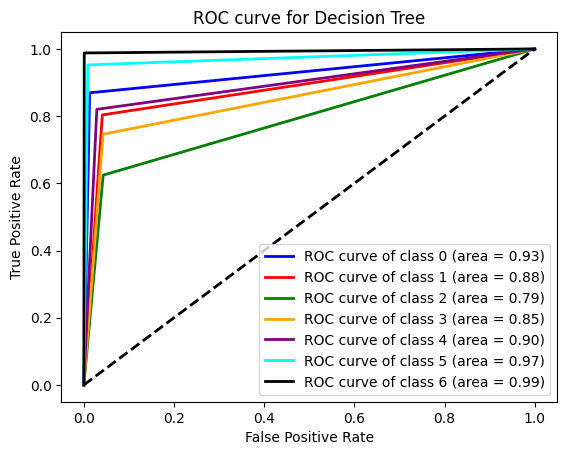

In [ ]:
y_bin = label_binarize(y_test, classes=[*range(7)])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'black'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

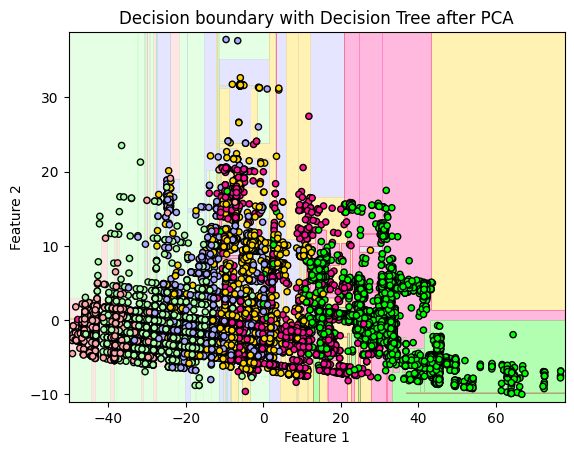

In [ ]:
dt_vis = DecisionTreeClassifier()
dt_vis.fit(X_train_pca, y_train)
# Plot the decision boundaries
plot_decision_boundary(X_train_pca, y_train, dt_vis, title='Decision boundary with Decision Tree after PCA')

Neural Network

In [ ]:
#Preprocess the data
def preprocess(data):
    data = data.rename(columns={'CH2O':'Water Consumption', 'TUE':'Television Viewing and Obesity'})
    #X=data.drop(["NObeyesdad"],axis=1)
    #y=df["NObeyesdad"]
    #X=X.drop(["id"],axis=1)
    X=data
    mapp={'Male': 0, 'Female': 1}
    X['Gender']=X['Gender'].map(mapp)
    mapp={'Automobile':0, 'Bike':1,'Motorbike':2, 'Public_Transportation':3, 'Walking':4}
    X['MTRANS']=X['MTRANS'].map(mapp)
    mapping = {'no': 0, 'yes': 1}
    X['family_history_with_overweight'] = X['family_history_with_overweight'].map(mapping)
    X['FAVC'] = X['FAVC'].map(mapping)
    X['SMOKE'] = X['SMOKE'].map(mapping)
    X['SCC'] = X['SCC'].map(mapping)
    mapping1 = {'Sometimes':1, 'Frequently':2, 'no':0, 'Always':3}
    X['CAEC'] = X['CAEC'].map(mapping1)
    X['CALC'] = X['CALC'].map(mapping1)
    return X

In [ ]:
#Print the data head
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Drop id and preprocess it and assign y
df=df.drop(["id"],axis=1)
X=df.drop(["NObeyesdad"],axis=1)
X=preprocess(X)
y=df['NObeyesdad']

In [ ]:
#Map the labels to 0 to 6
map_label={'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II':3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}

In [ ]:
#Print labels
y.head()

0    Overweight_Level_II
1          Normal_Weight
2    Insufficient_Weight
3       Obesity_Type_III
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

In [ ]:
#Now map the labels
y=y.map(map_label)

In [ ]:
#Create dummies
y_dummies=pd.get_dummies(y)

In [ ]:
#map true to 1 and 0 to false
tf_l_map={True: 1, False: 0}

In [ ]:
#Now map dummies
y_dummies=y_dummies.replace(tf_l_map)

In [ ]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_dummies, test_size = .25, random_state = 42)

In [ ]:
#Import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Define architecture
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(7, activation = 'softmax')
])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#train the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 500,batch_size = 32, verbose = 1)

Epoch 1/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.3488 - loss: 1.7807 - val_accuracy: 0.6428 - val_loss: 0.9194
Epoch 2/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.6635 - loss: 0.8328 - val_accuracy: 0.7077 - val_loss: 0.7103
Epoch 3/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.7025 - loss: 0.7155 - val_accuracy: 0.7289 - val_loss: 0.6633
Epoch 4/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.7326 - loss: 0.6567 - val_accuracy: 0.7437 - val_loss: 0.6125
Epoch 5/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.7614 - loss: 0.5933 - val_accuracy: 0.7846 - val_loss: 0.5502
Epoch 6/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.7800 - loss: 0.5561 - val_accuracy: 0.8198 - val_loss: 0.4822
Epoch 7/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.7938 - loss: 0.5376 - val_accuracy: 0.8060 - val_loss: 0.4864
Epoch 8/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8047 - loss: 0

In [ ]:
# Evaluate the model on the test data and obtain loss and accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict class labels for test data
y_pred = model.predict(X_test)

print('Accuracy Score with Neural Networks:', accuracy)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
Accuracy Score with Neural Networks: 0.8518304228782654


Text(0, 0.5, 'loss')

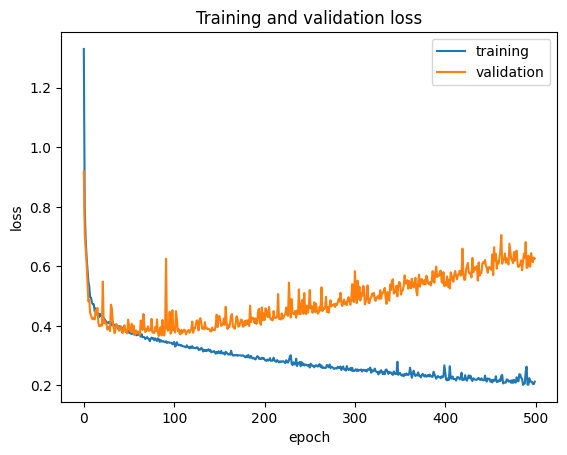

In [ ]:
#Plot loss values
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'Accuracy')

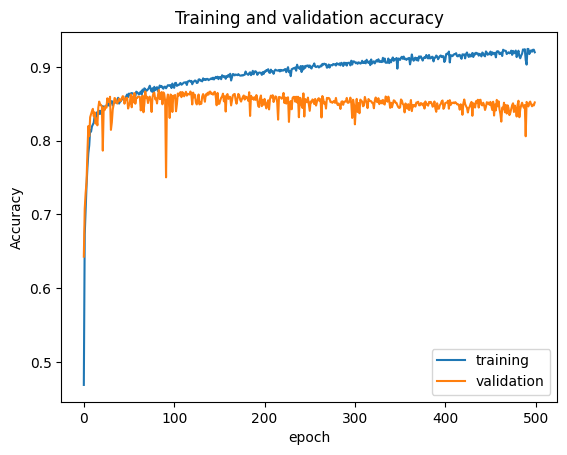

In [ ]:
#Plot accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step


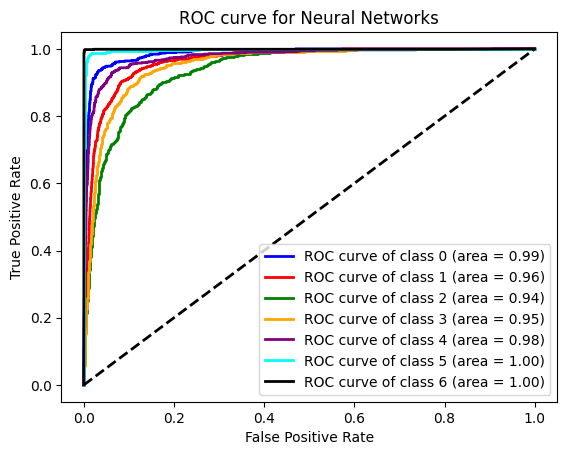

In [ ]:
#Plot ROC curves
y_bin = label_binarize(y_test, classes=[*range(7)])
y_pred_prob = model.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'black'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Neural Networks')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Save model weights
model.save_weights('my_model_nn_1.weights.h5')

In [ ]:
#Save the model
model.save('my_model_nn_1.h5')

In [ ]:
#Read the test data
df1=pd.read_csv('test.csv')

In [ ]:
#Drop id column and preprocess the data
df1=df1.drop(["id"],axis=1)
X=preprocess(df1)

In [ ]:
#Print the head of preproceessed data
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Water Consumption,SCC,FAF,Television Viewing and Obesity,CALC,MTRANS
0,0,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,3
1,1,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,3
2,1,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,3
3,0,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,3
4,1,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,3


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
model1 = load_model('my_model_nn_1.h5')
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Function to get predicted label
def prediction(X, model):
    y_test_pred=model.predict(X)
    highest_labels = np.argmax(y_test_pred, axis=1)
    map_label={0:'Insufficient_Weight', 1:'Normal_Weight', 2:'Overweight_Level_I', 3: 'Overweight_Level_II', 4:'Obesity_Type_I', 5:'Obesity_Type_II', 6:'Obesity_Type_III'}
    highest_labels_mapped = [map_label[label] for label in highest_labels]
    return highest_labels_mapped

In [ ]:
import numpy as np

In [ ]:
#Predict the labels for test data
highest_labels_mapped=prediction(X, model1)
highest_labels_mapped

433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


['Obesity_Type_II',
 'Overweight_Level_I',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Obesity_Type_III',
 'Insufficient_Weight',
 'Insufficient_Weight',
 'Normal_Weight',
 'Overweight_Level_II',
 'Normal_Weight',
 'Insufficient_Weight',
 'Obesity_Type_III',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Obesity_Type_III',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Obesity_Type_I',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Normal_Weight',
 'Obesity_Type_III',
 'Obesity_Type_III',
 'Obesity_Type_II',
 'Overweight_Level_I',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Overweight_Level_II',
 'Insufficient_Weight',
 'Obesity_Type_I',
 'Overweight_Level_II',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Normal_Weight',
 'Overweight_Level_I',
 'Overweight_Level_II',
 'Normal_Weight',
 'Insufficient_Weight',
 'Overweight_Level_II',
 'Obesity_Type_II',
 'Overweight_Level_II',
 'Obesity_Type_II',
 'Overweight_Level_II',
 'Normal_Weight',
 'Insufficient_Weight',
 'Overweight_Level_II',
 '

In [ ]:
#Predict the label for one row of the test data
highest_labels_mapped=prediction(X.loc[[1], :], model1)
highest_labels_mapped

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


['Overweight_Level_I']